<a href="https://colab.research.google.com/github/JMML2021/Analisis-Compa-ia-Aerea-Espa-ola/blob/main/Calculo%20Vueling%202022%20con%20codigos%20Rev%20E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [403]:
import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta
from colorama import init, Fore, Back, Style


# Cargar fichero de # Abrimos los ficheros 

In [404]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [405]:
path='/content/drive/MyDrive/2022.06.03 2022_delay + cierre puertas CORTO.xlsx'

In [406]:
#path= 'https://docs.google.com/spreadsheets/d/1cz18E5TXa0reXIBBjEajMk0lFvFqt2zg/edit?usp=sharing&ouid=111549489068693827872&rtpof=true&sd=true'

In [407]:
# Abrir fichero de Github.
path='/content/drive/MyDrive/2022.06.03 2022_delay + cierre puertas CORTO.xlsx'
Hoja = 'FLT_2022'

df = pd.read_excel(path, sheet_name=Hoja)


In [408]:
# Los nombre de las columnas tienen muchos espacios en blanco

nombreColumnas= df.columns
nombreColumnas

Index(['DATE                             ', 'FLT    ', 'REG   ', 'AC ', 'DEP',
       'ARR', 'STD  ', 'STA  ', 'TKof ',
       'TDwn                                                      ', 'ATD  ',
       'ATA  ', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX  ', 'LF ',
       'Taxi-out', 'Taxi-In', 'SLOT       ', 'C1', 'DLY1 ', 'Sub1', 'C2',
       'DLY2 ', 'Sub2', 'C3', 'DLY3 ', 'Sub3', 'C4', 'DLY4 ', 'Sub4', 'C1Arr',
       'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2'],
      dtype='object')

In [409]:
# Aqui corrijo los nombre de las columnas
nombreColumnaCorregido= ['DATE', 'FLT', 'REG', 'AC', 'DEP',
       'ARR', 'STD', 'STA', 'TKof', 'TDwn', 'ATD',
       'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2',
       'DLY2', 'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr',
       'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2']

In [410]:
df['Close Pax Door']

0      2022-01-01 07:58:00.000
1      2022-01-01 09:48:00.000
2      2022-01-01 11:38:00.000
3      2022-01-01 13:18:00.000
4      2022-01-01 15:07:00.000
                ...           
217    2022-01-01 11:40:00.000
218    2022-01-01 14:47:00.000
219    2022-01-01 18:03:00.000
220    2022-01-01 20:42:00.000
221    2022-01-01 10:48:00.000
Name: Close Pax Door, Length: 222, dtype: object

In [411]:
# Proceso para cambiar el nombre de las columnas por un bucle FOR
for n, m in enumerate(nombreColumnas):
  print(n, m,'*',nombreColumnaCorregido[n],'-')
  df.rename({m: nombreColumnaCorregido[n]}, axis=1, inplace=True)

0 DATE                              * DATE -
1 FLT     * FLT -
2 REG    * REG -
3 AC  * AC -
4 DEP * DEP -
5 ARR * ARR -
6 STD   * STD -
7 STA   * STA -
8 TKof  * TKof -
9 TDwn                                                       * TDwn -
10 ATD   * ATD -
11 ATA   * ATA -
12 BLOCK * BLOCK -
13 FLThr * FLThr -
14 DStand * DStand -
15 AStand * AStand -
16 ACT PAX   * ACT PAX -
17 LF  * LF -
18 Taxi-out * Taxi-out -
19 Taxi-In * Taxi-In -
20 SLOT        * SLOT -
21 C1 * C1 -
22 DLY1  * DLY1 -
23 Sub1 * Sub1 -
24 C2 * C2 -
25 DLY2  * DLY2 -
26 Sub2 * Sub2 -
27 C3 * C3 -
28 DLY3  * DLY3 -
29 Sub3 * Sub3 -
30 C4 * C4 -
31 DLY4  * DLY4 -
32 Sub4 * Sub4 -
33 C1Arr * C1Arr -
34 DLY1Arr * DLY1Arr -
35 Close Pax Door * Close Pax Door -
36 Close Cargo Door * Close Cargo Door -
37 Open Cargo/Pax Door * Open Cargo/Pax Door -
38 close pax door2 * close pax door2 -
39 close cargo door2 * close cargo door2 -
40 open cargo/pax door2 * open cargo/pax door2 -


In [412]:
df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()
print(df[['Secuencia','STD', 'DEP']][0:4])

   Secuencia       STD  DEP
0        1.0  07:40:00  BIO
1        2.0  09:40:00  SVQ
2        3.0  11:40:00  BIO
3        4.0  13:30:00  SCQ


In [413]:
# Identifico los Aeropuertos principales.

path =(r"/content/drive/MyDrive/Flights Movement 2019-2022 MAR.xlsx")
 
df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')
df_Aeropuertos = df_Aeropuertos.drop(['Borrar'], axis=1)

#df_Aeropuertos.head

In [414]:
df

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Sub4,C1Arr,DLY1Arr,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,close pax door2,close cargo door2,open cargo/pax door2,Secuencia
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,07:40:00,09:05:00,08:10:00,09:17:00,...,,8,00:15:00,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,07:58,07:31,09:23,1.0
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,09:40:00,11:05:00,10:03:00,11:07:00,...,,8,00:04:00,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,09:48,09:46,11:11,2.0
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,11:40:00,12:50:00,11:50:00,12:40:00,...,,,NaN,2022-01-01 11:38:00.000,2022-01-01 11:34:00.000,2022-01-01 12:46:00.000,11:38,11:34,12:46,3.0
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,13:30:00,14:35:00,13:30:00,14:08:00,...,,,NaN,2022-01-01 13:18:00.000,2022-01-01 13:06:00.000,2022-01-01 14:12:00.000,13:18,13:06,14:12,4.0
4,2022-01-01,3262,EC-JSY,320,BIO,TFN,15:15:00,18:20:00,15:23:00,18:07:00,...,,,NaN,2022-01-01 15:07:00.000,2022-01-01 15:01:00.000,2022-01-01 18:14:00.000,15:07,15:01,18:14,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-01-01,1898,EC-MKO,32A,BCN,DUS,11:45:00,14:00:00,11:55:00,13:45:00,...,,,NaN,2022-01-01 11:40:00.000,2022-01-01 11:41:00.000,2022-01-01 13:51:00.000,11:40,11:41,13:51,1.0
218,2022-01-01,1899,EC-MKO,32A,DUS,BCN,14:40:00,16:50:00,15:02:00,16:50:00,...,,8,00:04:00,2022-01-01 14:47:00.000,2022-01-01 14:40:00.000,2022-01-01 16:56:00.000,14:47,14:40,16:56,2.0
219,2022-01-01,8462,EC-MKO,32A,BCN,LIS,17:55:00,19:55:00,18:39:00,20:15:00,...,,8,00:24:00,2022-01-01 18:03:00.000,2022-01-01 18:01:00.000,2022-01-01 20:20:00.000,18:03,18:01,20:20,3.0
220,2022-01-01,8463,EC-MKO,32A,LIS,BCN,20:40:00,22:35:00,20:58:00,22:25:00,...,,8,00:03:00,2022-01-01 20:42:00.000,2022-01-01 20:41:00.000,2022-01-01 22:38:00.000,20:42,20:41,22:38,4.0


In [415]:
df.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia'],
      dtype='object')

In [416]:
# Convierto todas las columnas de tiempo en un formato correcto

formato = "%H:%M:%S"


def convertirTiempo(clave):
    df[clave] = pd.to_datetime(df[clave],
                               format=formato,
                               errors='coerce')


#columnasConvertir = ['DATE', 'STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr', 'Taxi-out', 'Taxi-In',
#                     'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door', 'close pax door2', 'close cargo door2', 'open cargo/pax door2',
#                     'SLOT', 'DLY1', 'DLY2']


columnasConvertir = ['DATE', 'STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr', 'Taxi-out', 'Taxi-In',
                     'DLY1Arr','close pax door2', 'close cargo door2', 'open cargo/pax door2',
                     'SLOT', 'DLY1', 'DLY2']
for x in columnasConvertir:
    convertirTiempo(x)
    #print(x)
# df.dtypes
df.head()

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Sub4,C1Arr,DLY1Arr,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,close pax door2,close cargo door2,open cargo/pax door2,Secuencia
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,1900-01-01 07:40:00,1900-01-01 09:05:00,1900-01-01 08:10:00,1900-01-01 09:17:00,...,,8,1900-01-01 00:15:00,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,NaT,NaT,NaT,1.0
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,1900-01-01 09:40:00,1900-01-01 11:05:00,1900-01-01 10:03:00,1900-01-01 11:07:00,...,,8,1900-01-01 00:04:00,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,NaT,NaT,NaT,2.0
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,1900-01-01 11:40:00,1900-01-01 12:50:00,1900-01-01 11:50:00,1900-01-01 12:40:00,...,,,NaT,2022-01-01 11:38:00.000,2022-01-01 11:34:00.000,2022-01-01 12:46:00.000,NaT,NaT,NaT,3.0
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,1900-01-01 13:30:00,1900-01-01 14:35:00,1900-01-01 13:30:00,1900-01-01 14:08:00,...,,,NaT,2022-01-01 13:18:00.000,2022-01-01 13:06:00.000,2022-01-01 14:12:00.000,NaT,NaT,NaT,4.0
4,2022-01-01,3262,EC-JSY,320,BIO,TFN,1900-01-01 15:15:00,1900-01-01 18:20:00,1900-01-01 15:23:00,1900-01-01 18:07:00,...,,,NaT,2022-01-01 15:07:00.000,2022-01-01 15:01:00.000,2022-01-01 18:14:00.000,NaT,NaT,NaT,5.0


In [417]:
#Subrutina que suma las fechas con las horas.
def adecuarFechas(fecha, tiempoClave):
    clave = "Date_" + tiempoClave
    print('.....Clave: ',clave, '....', fecha, tiempoClave)     
    df[tiempoClave] = pd.to_datetime(df[tiempoClave], format='%H:%M', errors='coerce')       
    
    df[tiempoClave] = pd.to_datetime( df[fecha].dt.strftime('%d/%m/%Y') + ' ' + df[tiempoClave].dt.strftime('%H:%M:%S'))

In [418]:
df1=df.copy()
print(df['STD'].head())
columnasAddDate= ['STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr',
                  'close pax door2', 'close cargo door2']
 
for x in columnasAddDate:    
    adecuarFechas('DATE', x)


0   1900-01-01 07:40:00
1   1900-01-01 09:40:00
2   1900-01-01 11:40:00
3   1900-01-01 13:30:00
4   1900-01-01 15:15:00
Name: STD, dtype: datetime64[ns]
.....Clave:  Date_STD .... DATE STD
.....Clave:  Date_STA .... DATE STA
.....Clave:  Date_TKof .... DATE TKof
.....Clave:  Date_TDwn .... DATE TDwn
.....Clave:  Date_ATD .... DATE ATD
.....Clave:  Date_ATA .... DATE ATA
.....Clave:  Date_BLOCK .... DATE BLOCK
.....Clave:  Date_FLThr .... DATE FLThr
.....Clave:  Date_close pax door2 .... DATE close pax door2
.....Clave:  Date_close cargo door2 .... DATE close cargo door2


In [419]:
#Agrupo por aeropuerto de Salida

df1['MES'] = df['STD'].dt.month

# Convierto todas las columnas de tiempo en un formato correcto

# Identificacion de los principales Aeropuertos

In [420]:
df= pd.merge(df,df_Aeropuertos, left_on= 'DEP', right_on='Dep')

df= pd.merge(df,df_Aeropuertos, left_on= 'ARR', right_on='Dep')


df= df.rename({'AeropuertoKey1_x': 'Aeropuerto_Key', 'AeropuertoKey1_y': 'AeropuertoKey1'}, axis=1)

df= df.sort_values(['DATE', 'REG', 'STD'])
df= df.reset_index(drop=True)
borrarColumnas = ['Dep_x', 'Dep_y']
df = df.drop(borrarColumnas, axis=1)
df.head(4)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,DLY1Arr,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,close pax door2,close cargo door2,open cargo/pax door2,Secuencia,Aeropuerto_Key,AeropuertoKey1
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,1900-01-01 00:15:00,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,NaT,NaT,NaT,1.0,BIO,SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,1900-01-01 00:04:00,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,NaT,NaT,NaT,2.0,SVQ,BIO
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,NaT,2022-01-01 11:38:00.000,2022-01-01 11:34:00.000,2022-01-01 12:46:00.000,NaT,NaT,NaT,3.0,BIO,SCQ
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,2022-01-01 13:30:00,2022-01-01 14:35:00,2022-01-01 13:30:00,2022-01-01 14:08:00,...,NaT,2022-01-01 13:18:00.000,2022-01-01 13:06:00.000,2022-01-01 14:12:00.000,NaT,NaT,NaT,4.0,SCQ,BIO


# Calculo tiempo en vuelo 1

In [421]:
df.columns
print(df['Close Pax Door'])

0      2022-01-01 07:58:00.000
1      2022-01-01 09:48:00.000
2      2022-01-01 11:38:00.000
3      2022-01-01 13:18:00.000
4      2022-01-01 15:07:00.000
                ...           
217    2022-01-01 11:40:00.000
218    2022-01-01 14:47:00.000
219    2022-01-01 18:03:00.000
220    2022-01-01 20:42:00.000
221    2022-01-01 10:48:00.000
Name: Close Pax Door, Length: 222, dtype: object


In [422]:
# Calulo tiempo de vuelo teorico Real y error
df['DuracionVueloTeorico']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'] = (df['DuracionVueloReal'] - df['DuracionVueloTeorico']) #/  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'].head(3)

0   -5.0
1   -7.0
2   -5.0
Name: E_Duracion_Vuelo, dtype: float64

# Tiempo Close Pax y Close Cargo Door

In [423]:
df['Close Pax Door']

0      2022-01-01 07:58:00.000
1      2022-01-01 09:48:00.000
2      2022-01-01 11:38:00.000
3      2022-01-01 13:18:00.000
4      2022-01-01 15:07:00.000
                ...           
217    2022-01-01 11:40:00.000
218    2022-01-01 14:47:00.000
219    2022-01-01 18:03:00.000
220    2022-01-01 20:42:00.000
221    2022-01-01 10:48:00.000
Name: Close Pax Door, Length: 222, dtype: object

In [424]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
print(df['Close Pax Door'].head(4))
print('-----------------')
print(df1['ATD'].head(4))

0   2022-01-01 07:58:00
1   2022-01-01 09:48:00
2   2022-01-01 11:38:00
3   2022-01-01 13:18:00
Name: Close Pax Door, dtype: datetime64[ns]
-----------------
0   1900-01-01 08:00:00
1   1900-01-01 09:51:00
2   1900-01-01 11:40:00
3   1900-01-01 13:23:00
Name: ATD, dtype: datetime64[ns]


In [425]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df['t_ClosePax'] =   (df['Close Pax Door'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['t_ClosePax']

0      -2.0
1      -3.0
2      -2.0
3      -5.0
4       0.0
       ... 
217    -2.0
218     0.0
219   -20.0
220    -5.0
221    -9.0
Name: t_ClosePax, Length: 222, dtype: float64

In [426]:
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])
df['t_Close_Cargo_Door'] = (df ['Close Cargo Door'] - df['ATD']) /  np.timedelta64(1, 'm') 

df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])

df['t_Entre_Puertas'] = (df ['Close Cargo Door'] - df['Close Pax Door']) /  np.timedelta64(1, 'm') 
df[[ 't_ClosePax','t_Close_Cargo_Door', 't_Entre_Puertas'] ].head(4)

,t_ClosePax,t_Close_Cargo_Door,t_Entre_Puertas
0,-2.0,-29.0,-27.0
1,-3.0,-5.0,-2.0
2,-2.0,-6.0,-4.0
3,-5.0,-17.0,-12.0


In [427]:
df ['Close Cargo Door']

0     2022-01-01 07:31:00
1     2022-01-01 09:46:00
2     2022-01-01 11:34:00
3     2022-01-01 13:06:00
4     2022-01-01 15:01:00
              ...        
217   2022-01-01 11:41:00
218   2022-01-01 14:40:00
219   2022-01-01 18:01:00
220   2022-01-01 20:41:00
221   2022-01-01 10:50:00
Name: Close Cargo Door, Length: 222, dtype: datetime64[ns]

In [428]:
df['t_Close_Cargo_Door']

0     -29.0
1      -5.0
2      -6.0
3     -17.0
4      -6.0
       ... 
217    -1.0
218    -7.0
219   -22.0
220    -6.0
221    -7.0
Name: t_Close_Cargo_Door, Length: 222, dtype: float64

In [429]:
# Estudio los trayectos.
condicion = [(df['DEP'] < df['ARR']),  (df['ARR'] < df['DEP'])]

valores = [  (df['DEP'] + '-' + df['ARR']),  (df['ARR'] + '-' + df['DEP'])]

df['Trayecto'] = np.select(condicion, valores ) 
df['Trayecto'].head(4)

#df5 = df.where('Departure' > 'Arrival',  'Departure' + 'Arrival',  'Arrival' +'Departure')

0    BIO-SVQ
1    BIO-SVQ
2    BIO-SCQ
3    BIO-SCQ
Name: Trayecto, dtype: object

In [430]:
# Creo la secuencia de vuelos de cada avión cada día

df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()


df1=df
df1.head(2)



,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Secuencia,Aeropuerto_Key,AeropuertoKey1,DuracionVueloTeorico,DuracionVueloReal,E_Duracion_Vuelo,t_ClosePax,t_Close_Cargo_Door,t_Entre_Puertas,Trayecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,1.0,BIO,SVQ,85.0,80.0,-5.0,-2.0,-29.0,-27.0,BIO-SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,2.0,SVQ,BIO,85.0,78.0,-7.0,-3.0,-5.0,-2.0,BIO-SVQ


In [431]:
# Analizo el retardo en el despegue:
def dibujarScatter( ejeX, ejeY):
    x= df1[ejeX]
    y = df1[ejeY]    
    ax = sns.scatterplot(x , y )



# Puntualidad media primer despegue en el 2019!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


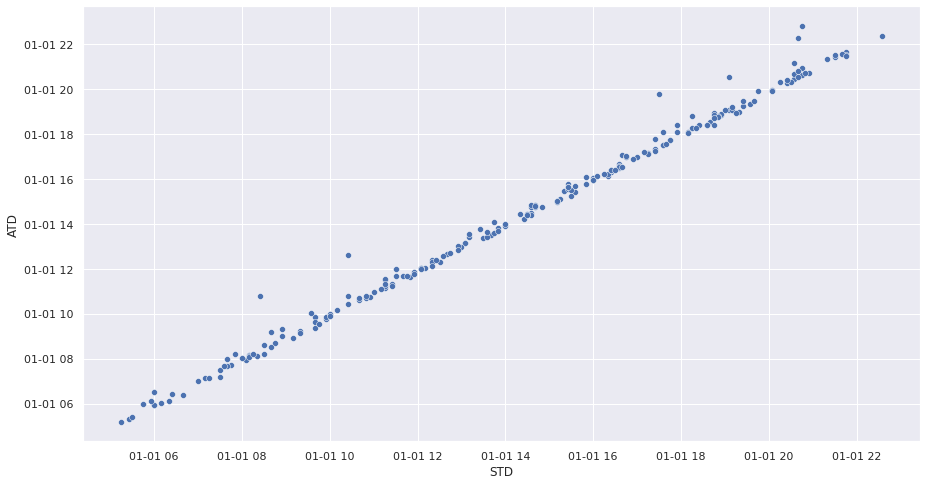

In [432]:
ax = sns.scatterplot( df1['STD'], df1['ATD'])

# Calculo error del primer despegue.

In [433]:
# Filtro primer despegue

vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]
print(df2[['DATE','REG', 'Secuencia','STD']][0:8])


         DATE     REG  Secuencia                 STD
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00
21 2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00
24 2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00
29 2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00
33 2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00


In [434]:

#Calculo error despegue:
'''
vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]

df2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')


#df2['E_Despegue']=df2['E_Despegue'].np.time

df2['E_Despegue'].head(8)
print(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])
#sns.histplot(data= df1.E_Despegue, kde= True)
'''

"\nvuelosPrimerDespegue= (df1['Secuencia']== 1)\ndf2 = df1[vuelosPrimerDespegue]\n\ndf2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')\n\n\n#df2['E_Despegue']=df2['E_Despegue'].np.time\n\ndf2['E_Despegue'].head(8)\nprint(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])\n#sns.histplot(data= df1.E_Despegue, kde= True)\n"

In [435]:
#Calculo error primer despegue despegue:

df1['E_Despegue'] = (df1['ATD']- df1['STD']) /  np.timedelta64(1, 'm')

 
df1['E_Despegue'].head()
 

#print(df1['E_Despegue'][0], '-----', df1['Date_ATD'][0], '........', df1['Date_STD'][0])
#print(df1[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])

print(df2[['DATE','REG', 'Secuencia','STD', 'ATD']][0:8])

print('Media = ', df1['E_Despegue'].mean())

         DATE     REG  Secuencia                 STD                 ATD
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00 2022-01-01 07:12:00
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00 2022-01-01 14:27:00
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00 2022-01-01 08:13:00
21 2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00 2022-01-01 17:31:00
24 2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00 2022-01-01 05:20:00
29 2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00 2022-01-01 07:29:00
33 2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00 2022-01-01 12:01:00
Media =  2.77027027027027


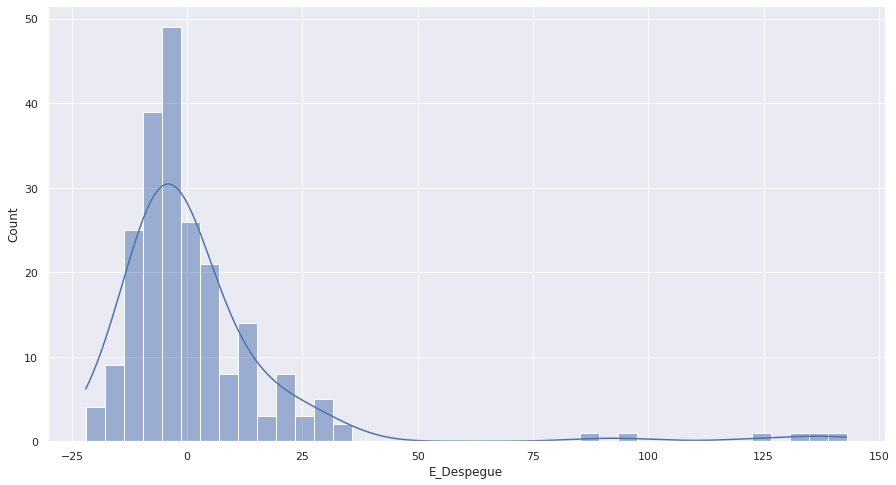

In [436]:
sns.histplot(data= df1.E_Despegue, kde= True)

# Vemos que hay mucha dispersion hay que filtrar los datos a:
## error de salida > 30 y < 30 y es el primer despegue


Media filtrada =  2.77 minutos
     Secuencia  E_Despegue AeropuertoKey1
0          1.0        20.0            SVQ
6          1.0       -18.0            PMI
12         1.0         7.0            AGP
16         1.0        23.0           otro
21         1.0        -4.0            BCN
24         1.0        -5.0            AGP
29         1.0        -1.0           otro
33         1.0        -4.0            PMI
34         1.0        -8.0            PMI
36         1.0        -3.0           otro
42         1.0         0.0            BCN
49         1.0         0.0            TFN
53         1.0        -7.0           otro
57         1.0        -1.0            AGP
62         1.0       -12.0           otro
66         1.0        -3.0           otro
73         1.0        -7.0            FCO
77         1.0        -5.0           otro
79         1.0        -3.0           otro
84         1.0        -2.0            VLC
88         1.0        -2.0           otro
92         1.0       -11.0           otro
96

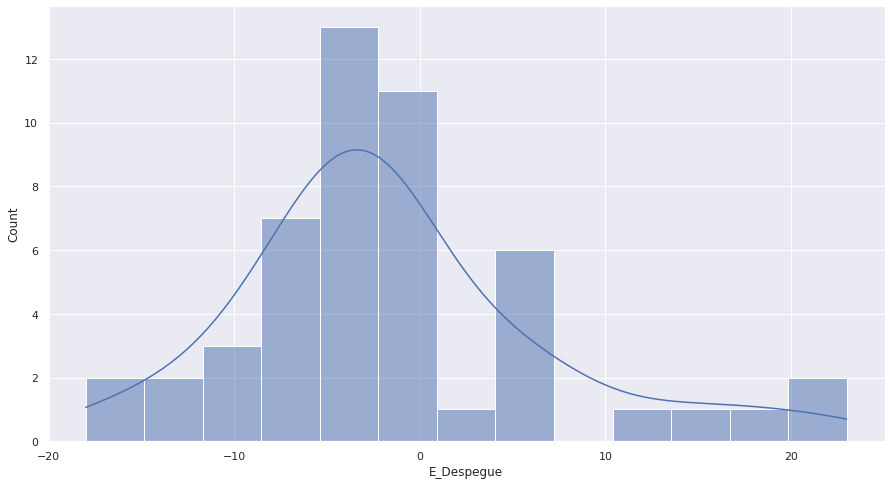

In [437]:
# Eliminar los outliers
df2=df.copy()
dfEliminarOutliers= ((df2['Secuencia']== 1) & (df2['E_Despegue']< 30) & (df2['E_Despegue']> -30))

df2 = df[dfEliminarOutliers]
sns.histplot(data= df2.E_Despegue, kde= True)
print()
print('Media filtrada = ', round(df1['E_Despegue'].mean(),2), 'minutos')
print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 

In [438]:
# Para saber la puntualidad solo de Barcelona
df2barcelonaPuntualida = (df2['DEP']== 'BCN')


df2BarcelonaPuntualida = df2[df2barcelonaPuntualida]
df2barcelonaPuntualida.head()

#df2BarcelonaPuntualida.head()
puntualidadBCN = round((df2BarcelonaPuntualida['E_Despegue'].mean()),2)#
print(df2BarcelonaPuntualida[[ 'DATE',   'FLT',     'REG',  'AC', 'DEP',  'ARR']] )

          DATE   FLT     REG   AC  DEP  ARR
12  2022-01-01  2117  EC-KDG  320  BCN  AGP
24  2022-01-01  2115  EC-KLB  320  BCN  AGP
29  2022-01-01  2915  EC-KLT  320  BCN  BOD
33  2022-01-01  3926  EC-KMI  320  BCN  PMI
34  2022-01-01  3910  EC-KRH  320  BCN  PMI
36  2022-01-01  1220  EC-LLJ  320  BCN  LYS
53  2022-01-01  2475  EC-LOP  320  BCN  ACE
57  2022-01-01  2111  EC-LUO  320  BCN  AGP
62  2022-01-01  8714  EC-LVO  320  BCN  VIE
66  2022-01-01  1290  EC-LVP  320  BCN  LCG
73  2022-01-01  6110  EC-LVS  320  BCN  FCO
79  2022-01-01  6400  EC-LVV  320  BCN  VCE
92  2022-01-01  2020  EC-MAN  320  BCN  GRX
100 2022-01-01  1812  EC-MBD  320  BCN  MUC
108 2022-01-01  6104  EC-MBF  320  BCN  FCO
120 2022-01-01  8538  EC-MBT  320  BCN  OSL
124 2022-01-01  3714  EC-MDZ  320  BCN  MAH
136 2022-01-01  2226  EC-MEQ  32A  BCN  SVQ
140 2022-01-01  1292  EC-MER  32A  BCN  LCG
142 2022-01-01  3504  EC-MES  32A  BCN  IBZ
146 2022-01-01  6522  EC-MFK  320  BCN  BLQ
160 2022-01-01  8476  EC-MGE  32

Text(0.5, 1.0, 'Puntualidad principales aeropuertos:')

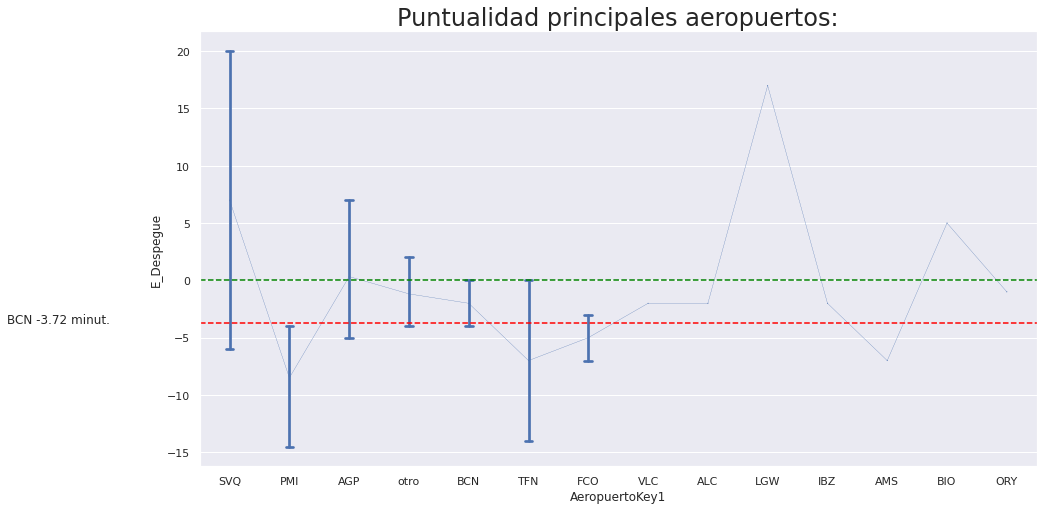

In [439]:
# Intervalos de Confianza por aeropuerto
sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_Despegue", data= df2, scale=.1, kind = "point", capsize=0.13)

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualidad principales aeropuertos:', fontsize = 24)

# tiempo 'Close Cargo Door'  -   'Close Pax'


Media filtrada =  -26.22 minutos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


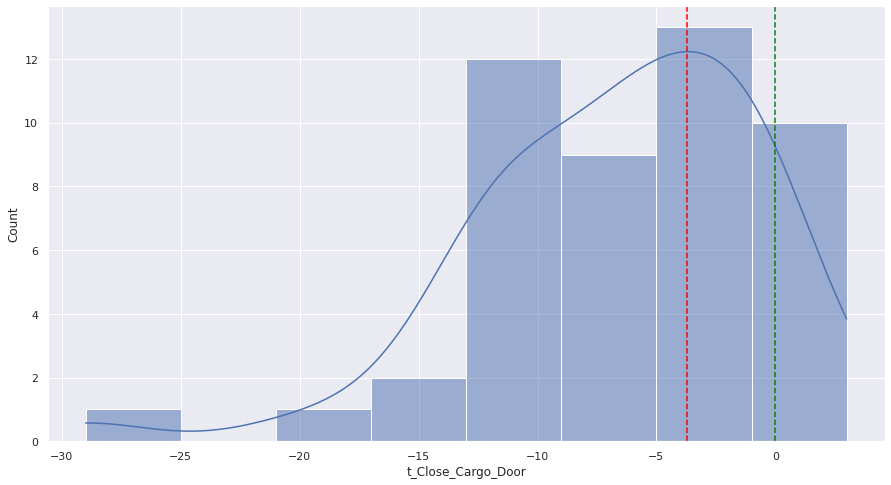

In [440]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_Close_Cargo_Door']< 30) & (df1['t_Close_Cargo_Door']> -30))

df2 = df2[dfEliminarOutliers]
#df2 = df2[dfEliminarOutliers]

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df1['t_Close_Cargo_Door'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# tiempo  'tiempo Close Pax'  -   'ATD'


Media filtrada =  -20.99 minutos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


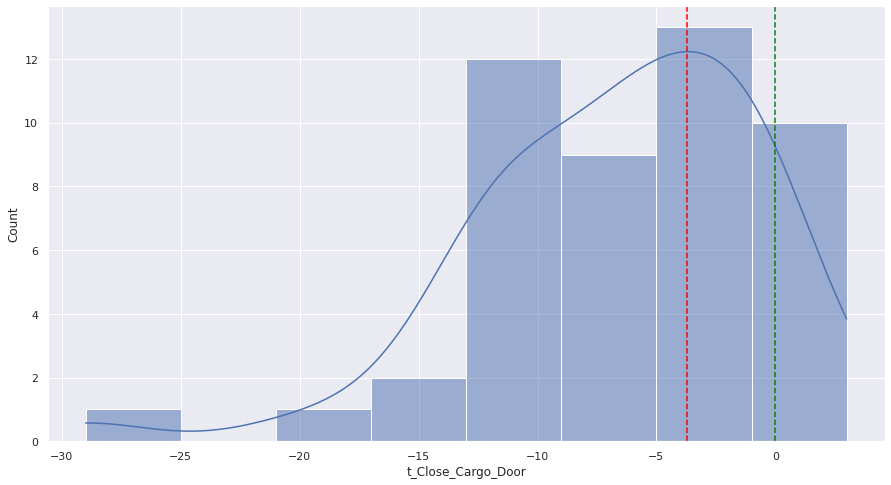

In [441]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_ClosePax']< 30) & (df1['t_ClosePax']> -30))

df2 = df2[dfEliminarOutliers] 

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df1['t_ClosePax'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


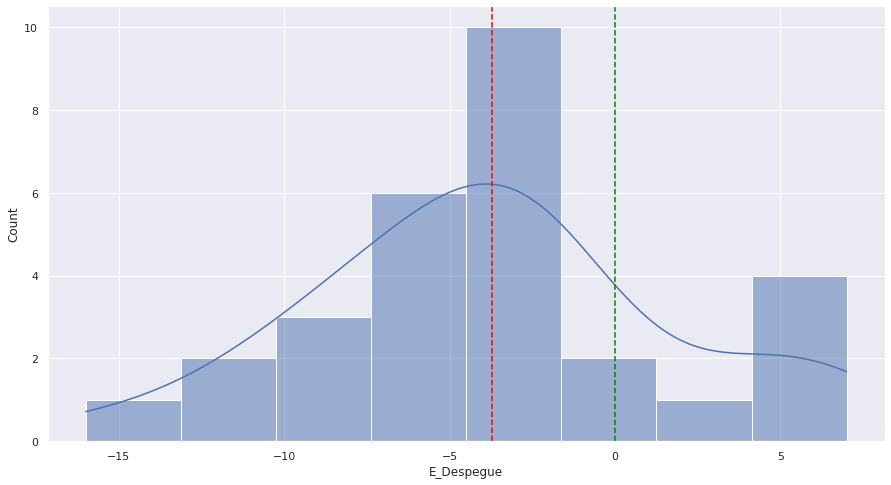

In [442]:
ax=sns.histplot(data= df2BarcelonaPuntualida.E_Despegue, kde= True)

ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# creamos los LAGs

In [450]:
#Creamos los LAGs

df[f'lag_STD']= df['STD'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATD']= df['ATD'].shift(periods=-1)  

df[f'lag_STA']= df['STA'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATA']= df['ATA'].shift(periods=-1) 

#adecuarFechas('Pasajeros', 'ACT PAX  ')
df[f'lag_ACT PAX']= df['ACT PAX'].shift(periods=-1) 

#Lag de la siguiente secuencia
df[f'lag_Secuencia']= df['Secuencia'].shift(periods=-1) 
df[f'lag_REG']= df['REG'].shift(periods=-1) 

df[['lag_Secuencia', 'lag_REG']]

,lag_Secuencia,lag_REG
0,2.0,EC-JSY
1,3.0,EC-JSY
2,4.0,EC-JSY
3,5.0,EC-JSY
4,6.0,EC-JSY
...,...,...
217,2.0,EC-MKO
218,3.0,EC-MKO
219,4.0,EC-MKO
220,1.0,EC-MKV


# Tiempo en tierra de una avion despues primer salto
##df3 --> Calculo tiempo en tierra

In [447]:
df= df.sort_values(['DATE', 'REG', 'STD'])



df['T_teoricoTierra1'] = (df['lag_STD']- df['STA']) /  np.timedelta64(1, 'm')
df['T_RealTierra1'] = (df['lag_ATD']- df['ATA']) /  np.timedelta64(1, 'm')

df['E_tierra1'] = df['T_RealTierra1'] -df['T_teoricoTierra1']


#df[f'lag_STD']= df['STD'].shift(periods=-1)  


df3=df
#selecionoSecuencia_1= (df['Secuencia']== 1)
#df3 = df[selecionoSecuencia_1]


#print(df3[['DATE','REG', 'Secuencia']][0:8])

print(df3[['FLT', 'Secuencia','STD', 'ATD', 'lag_STD', 'T_teoricoTierra1', 'E_tierra1']][0:4])
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')


    FLT  Secuencia                 STD                 ATD  \
0  2506        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00   
1  2505        2.0 2022-01-01 09:40:00 2022-01-01 09:51:00   
2  1386        3.0 2022-01-01 11:40:00 2022-01-01 11:40:00   
3  1387        4.0 2022-01-01 13:30:00 2022-01-01 13:23:00   

              lag_STD  T_teoricoTierra1  E_tierra1  
0 2022-01-01 09:40:00              35.0       -4.0  
1 2022-01-01 11:40:00              35.0       -4.0  
2 2022-01-01 13:30:00              40.0       -2.0  
3 2022-01-01 15:15:00              40.0       16.0  

Media filtrada =  18.71 minutos


In [448]:
# Retraso
df['Puntualidad1'] = (df['ATA'] - df['STA']) /  np.timedelta64(1, 'm') 
df['Puntualidad1'].head(3)

0    15.0
1     4.0
2    -5.0
Name: Puntualidad1, dtype: float64

In [449]:
# Total pasajeros Boarding

df['Total_PAX_Boarding'] = df['lag_ACT PAX'] +df['ACT PAX']

df['Total_PAX_Boarding'] 

df['T_Medio_Boarding'] = round(df['Total_PAX_Boarding'] / df['T_RealTierra1'],1)
df[['T_Medio_Boarding', 'Total_PAX_Boarding', 'T_RealTierra1']]
#df['T_Medio_Boarding']

,T_Medio_Boarding,Total_PAX_Boarding,T_RealTierra1
0,6.6,206.0,31.0
1,4.4,135.0,31.0
2,2.1,78.0,38.0
3,3.6,202.0,56.0
4,7.5,276.0,37.0
...,...,...,...
217,5.9,328.0,56.0
218,2.7,244.0,89.0
219,5.4,152.0,28.0
220,-0.1,101.0,-701.0


# Calculo Tiempod e carga y descarga:
Cojo solo las segundas secuencias que tengan el siguiente vuelo el mismo REG

# Creamos los LAG siguientes saltos

In [346]:
df.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'Aeropuerto_Key', 'AeropuertoKey1', 'DuracionVueloTeorico',
       'DuracionVueloReal', 'E_Duracion_Vuelo', 't_ClosePax',
       't_Close_Cargo_Door', 't_Entre_Puertas', 'Trayecto', 'E_Despegue',
       'lag_STD', 'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX',
       'T_teoricoTierra1', 'T_RealTierra1', 'E_tierra1', 'Puntualidad1'],
      dtype='object')

In [347]:
#Creamos los LAGs
df[f'E_Despegue2']= df['E_Despegue'].shift(periods=-1) 
df[f'E_Despegue3']= df['E_Despegue'].shift(periods=-2) 

df[f'E_Duracion_Vuelo2']= df['E_Duracion_Vuelo'].shift(periods=-1) 
df[f'E_Duracion_Vuelo3']= df['E_Duracion_Vuelo'].shift(periods=-2) 

df[f'E_tierra2']= df['E_tierra1'].shift(periods=-1) 
df[f'E_tierra3']= df['E_tierra1'].shift(periods=-2) 

df[f'Aeropuerto_Key2']= df['Aeropuerto_Key'].shift(periods=-1) 
df[f'Aeropuerto_Key3']= df['Aeropuerto_Key'].shift(periods=-2) 


df[f'Puntualidad2']= df['Puntualidad1'].shift(periods=-1) 
df[f'Puntualidad3']= df['Puntualidad1'].shift(periods=-2) 


df[f'E_Despegue_Total'] = df[f'E_Despegue'] + df[f'E_Despegue2'] + df[f'E_Despegue3']
df[f'E_Duracion_Vuelo_Total'] = df[f'E_Duracion_Vuelo'] + df[f'E_Duracion_Vuelo2'] + df[f'E_Duracion_Vuelo3']  
df[f'E_tierra_Total'] = df[f'E_tierra1'] + df[f'E_tierra2'] + df[f'E_tierra3']    

df['E_acumulado_Total'] = df[f'E_Despegue_Total'] + df[f'E_Duracion_Vuelo_Total'] + df[f'E_tierra_Total'] 


# Estudio en Tierra primer aterrizaje.

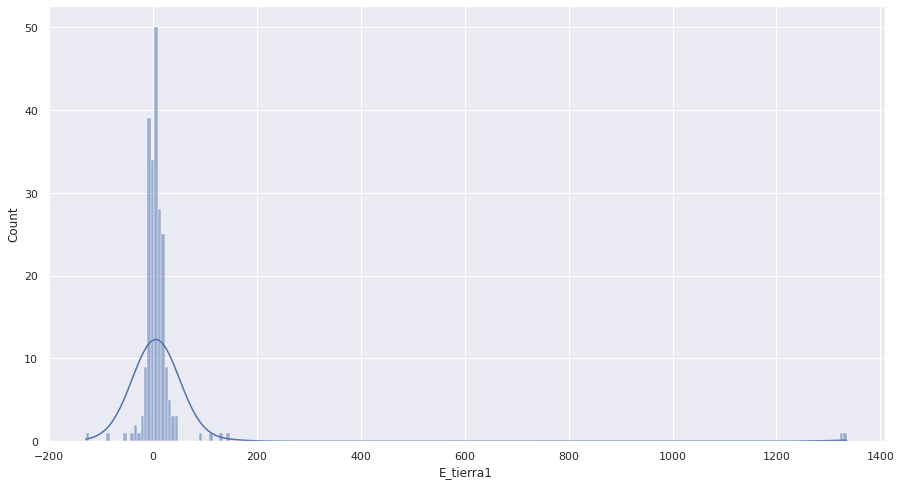

In [265]:
sns.histplot(data= df3.E_tierra1, kde= True)


Media filtrada =  4.44 minutos


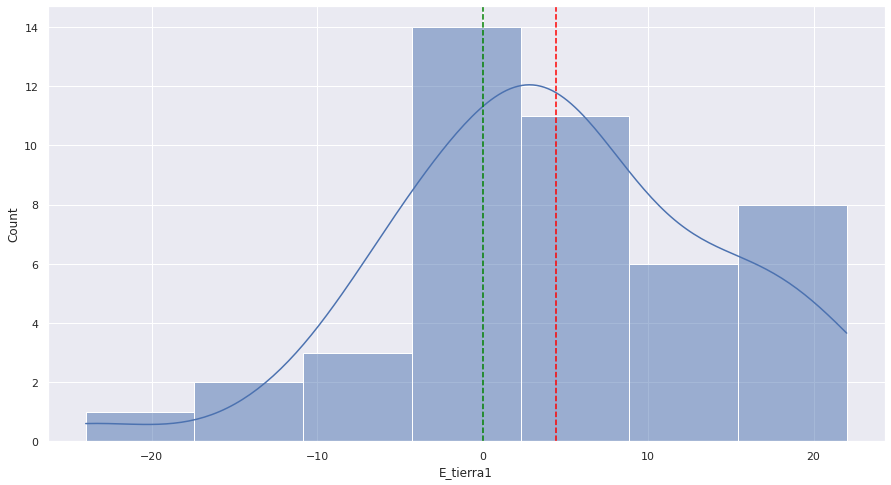

In [266]:
# Eliminar los outliers
#df2=df1
dfEliminarOutliers= ((df3['Secuencia']== 1) & (df3['E_tierra1']< 30) & (df3['E_tierra1']> -30))

df3 = df3[dfEliminarOutliers]
ax = sns.histplot(data= df3.E_tierra1, kde= True)
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')

media = round(df3['E_tierra1'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')

In [267]:
# Crear Subgrupos de tiempo de boarding:
'''
df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000,0, 41, 46,51,60,100000], labels=['NEGATIVOS',
                                                                                              '1.- >0 & <=41',
                                                                                              '2.- >42 & <=46',
                                                                                              '3.- >47 & <51',
                                                                                              '4.- >52 & <60',
                                                                                              '5.- >61'])
'''

df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000, 0, 39, 40, 45, 50, 55, 60, 100000], labels=['NEGATIVOS',
                                                                                                          
                                                                                                          '1.- <40',
                                                                                                          '2.- 40',
                                                                                                          '3.- 45',
                                                                                                          '4.- 50',
                                                                                                          '5.- 55',
                                                                                                          '6.- 60', 
                                                                                                          '7.- >60'])
df3[['T_teoricoTierra1', 't_boarding']].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,T_teoricoTierra1,t_boarding
36,40.0,2.- 40
66,35.0,1.- <40
140,35.0,1.- <40
154,35.0,1.- <40
100,40.0,2.- 40


In [268]:
# Para saber error primer boarding solo de Barcelona

barcelonaTierra = (df3['ARR']== 'BCN')

df4BarcelonaTierra = df3[barcelonaTierra]
df4BarcelonaTierra .head()
df4BarcelonaTierraError  = round((df4BarcelonaTierra ['E_tierra1'].mean()),2)
print('Error en el aterrizaje de Barcelona ', df4BarcelonaTierraError)

Error en el aterrizaje de Barcelona  -4.5


Text(0.5, 1.0, 'Error primer t. BOARDING principales aeropuertos:')

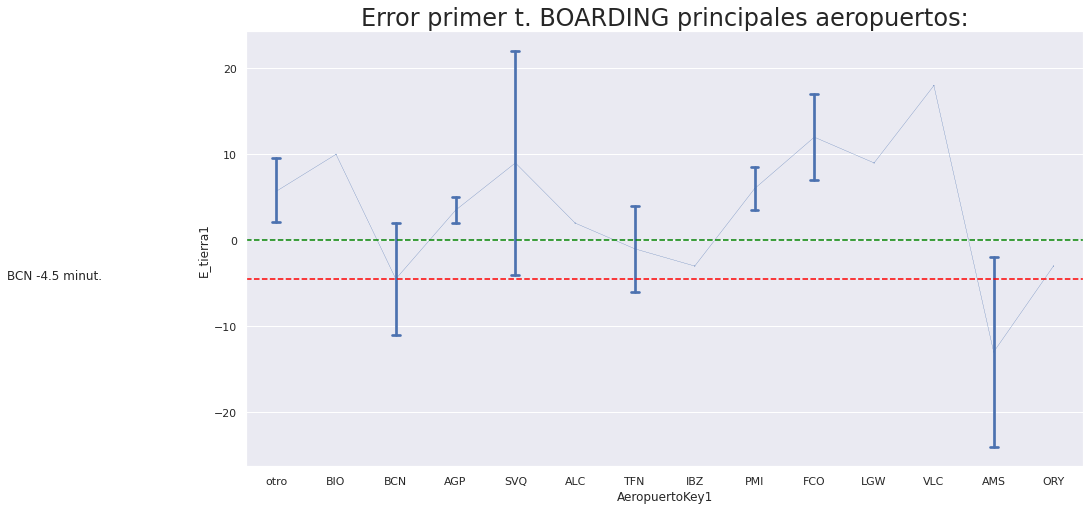

In [269]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_tierra1", data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(df4BarcelonaTierraError , color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error primer t. BOARDING principales aeropuertos:', fontsize = 24)

In [270]:
df4BarcelonaTierra .head()

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,E_tierra3,Aeropuerto_Key2,Aeropuerto_Key3,Puntualidad2,Puntualidad3,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,t_boarding
42,2022-01-01,2114,EC-LLM,320,AGP,BCN,2022-01-01 07:40:00,2022-01-01 09:15:00,2022-01-01 07:55:00,2022-01-01 09:09:00,...,-7.0,BCN,AGP,-14.0,6.0,0.0,-11.0,0.0,-11.0,3.- 45
21,2022-01-01,3909,EC-KDX,320,PMI,BCN,2022-01-01 17:35:00,2022-01-01 18:30:00,2022-01-01 17:45:00,2022-01-01 18:22:00,...,9.0,BCN,PMI,-16.0,-12.0,-19.0,-8.0,7.0,-20.0,5.- 55


In [271]:
# Contabilizar elementos por grupo de boarding
df5= df3['t_boarding'].value_counts()
#df5['t_boarding']= df5.sort_values('t_boarding')
df5.head()
df5

1.- <40      15
2.- 40       15
3.- 45        7
7.- >60       4
4.- 50        2
5.- 55        2
NEGATIVOS     0
6.- 60        0
Name: t_boarding, dtype: int64

Text(0.5, 1.0, 'Error boarding BCN:')

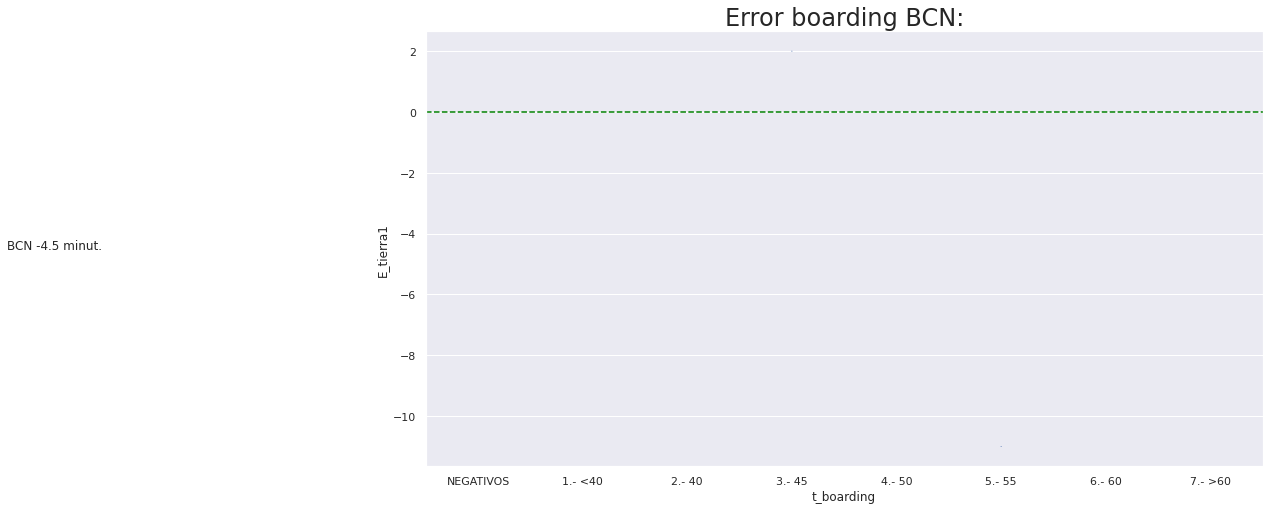

In [272]:
# Intervalos de Confianza por grupo de boarding.

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='t_boarding', y = "E_tierra1", data= df4BarcelonaTierra, scale=.1, kind = "point", capsize=0.13)

#ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error boarding BCN:', fontsize = 24)

# Guardar a EXCEL

In [273]:
# Borro las columnas que no me interesan.

'''
borrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',
       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',
       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']
df3 = df3.drop(borrarColumnas, axis=1)
'''

"\nborrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',\n       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',\n       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']\ndf3 = df3.drop(borrarColumnas, axis=1)\n"

In [274]:
df3.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'Aeropuerto_Key', 'AeropuertoKey1', 'DuracionVueloTeorico',
       'DuracionVueloReal', 'E_Duracion_Vuelo', 't_ClosePax',
       't_Close_Cargo_Door', 't_Entre_Puertas', 'Trayecto', 'E_Despegue',
       'lag_STD', 'lag_ATD', 'lag_STA', 'lag_ATA', 'T_teoricoTierra1',
       'T_RealTierra1', 'E_tierra1', 'Puntualidad1', 'E_Despegue2',
       'E_Despegue3', 'E_Duracion_Vuelo2', 'E_Duracion_Vuelo3', 'E_tierra2',
       'E_tierra3', 'Aeropuerto_Key2', 'Aeropuerto_Key3', 'Puntualidad2',
       'Puntualidad3', 'E_Despegue_Total', 'E_D

In [275]:
# Guardar excel

#df3.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_" + Hoja + ".xlsx")
print()
print('Guardado fichero : Vueling_Python.xlsx')
print()


Guardado fichero : Vueling_Python.xlsx



# Estudio de la duracion del vuelo

In [276]:
# Identifico los Aeropuertos principales.


path =(r"/content/drive/MyDrive/Vueling_Trayectos_Duracion_Vuelo.xlsx")
 
#df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')

#path =(r"D:\Documentos D\02.- Datos Vueling\Vueling_Trayectos_Duracion_Vuelo.xlsx")


df_Trayectos = pd.read_excel(path, sheet_name='Trayectos')
df_Trayectos = df_Trayectos.drop(['Borrar'], axis=1)
df_Trayectos.head(3)

,Trayecto,grupoTrayecto
0,BCN-PMI,BCN-PMI
1,BCN-SVQ,BCN-SVQ
2,BCN-ORY,BCN-ORY


In [277]:
df.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'Aeropuerto_Key', 'AeropuertoKey1', 'DuracionVueloTeorico',
       'DuracionVueloReal', 'E_Duracion_Vuelo', 't_ClosePax',
       't_Close_Cargo_Door', 't_Entre_Puertas', 'Trayecto', 'E_Despegue',
       'lag_STD', 'lag_ATD', 'lag_STA', 'lag_ATA', 'T_teoricoTierra1',
       'T_RealTierra1', 'E_tierra1', 'Puntualidad1', 'E_Despegue2',
       'E_Despegue3', 'E_Duracion_Vuelo2', 'E_Duracion_Vuelo3', 'E_tierra2',
       'E_tierra3', 'Aeropuerto_Key2', 'Aeropuerto_Key3', 'Puntualidad2',
       'Puntualidad3', 'E_Despegue_Total', 'E_D

In [278]:
# Solo escojo los datos que necesito para le calculo volando
'''
df.columns
df5 = df
borrarColumnas = ['Leg Code', 'Total DLY Dep', 'Close Pax Door',
                  'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',
                  'lag_STD', 'lag_ATD','t_ClosePax', 't_Close_Cargo_Door','T_teoricoTierra1',
                  'T_RealTierra1', 't_Entre_Puertas']

df5 = df5.drop(borrarColumnas, axis=1)
df5.head(1)
'''

"\ndf.columns\ndf5 = df\nborrarColumnas = ['Leg Code', 'Total DLY Dep', 'Close Pax Door',\n                  'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',\n                  'lag_STD', 'lag_ATD','t_ClosePax', 't_Close_Cargo_Door','T_teoricoTierra1',\n                  'T_RealTierra1', 't_Entre_Puertas']\n\ndf5 = df5.drop(borrarColumnas, axis=1)\ndf5.head(1)\n"

In [279]:
# Agrupo por Trayecto

df5 = df

df5 = pd.merge(df5, df_Trayectos, left_on='Trayecto', right_on='Trayecto')


df5 = df5.sort_values(['DATE', 'REG', 'STD'])
df5 = df5.reset_index(drop=True) 
df5.head(3)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,E_tierra3,Aeropuerto_Key2,Aeropuerto_Key3,Puntualidad2,Puntualidad3,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,grupoTrayecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,-12.0,AGP,BIO,19.0,5.0,53.0,-14.0,-25.0,14.0,otro
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,-9.0,BIO,AGP,15.0,19.0,54.0,-16.0,-17.0,21.0,otro
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,8.0,SCQ,BCN,-24.0,-9.0,-15.0,-23.0,22.0,-16.0,otro


In [282]:
#Save only the first secuence.
from datetime import datetime
fecha=datetime.now()

dfRegistros1= (df5['Secuencia']== 1) 

df5 = df5[dfRegistros1]

path = str(fecha) + Hoja + ".xlsx"
#df5.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_Vuelo_" + Hoja + ".xlsx")

df5.to_excel(path)
print()
print('Guardado fichero : Vueling_Python_MAR_Vuelo.xlsx')
print()


Guardado fichero : Vueling_Python_MAR_Vuelo.xlsx



# Calculo Tiempode carga y descarga de pasajeros

In [ ]:


df[f'lag_ATA']= df['ATA'].shift(periods=-1) 